# Neural networks 
In this exercise, we are going to use neural networks for a classification problem with two classes. Since there are only two classes, we do not need to use the softmax function on the neural network output. 
We are going to use the functionalities of `sklearn` and compare the output to our own implementation of a neural network. 

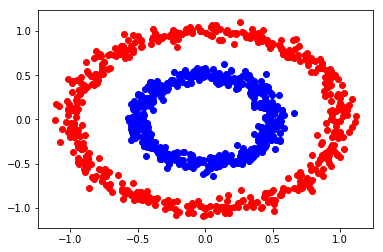

In [13]:
from sklearn import datasets
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

noisy_circles = datasets.make_circles(n_samples=1000, factor=.5,
                                      noise=.05, random_state=1)
X = np.array(noisy_circles[0])
y = noisy_circles[1]

plt.scatter(X[y==1][:,0],X[y==1][:,1], color='b')
plt.scatter(X[y==0][:,0],X[y==0][:,1], color='r')

**Task 1**

Use a neural network to train a classifier given the above training data! You might want to read the description of the options of `MLPClassifier`. What we want is the neural network we discussed in the lecture, i.e. a neural network with one hidden layer using the sigmoid function as activation function. 


In [26]:
classifier = MLPClassifier(
    # probably needs some options...
    random_state=1,
    hidden_layer_sizes = (10,),
    activation='logistic',
    solver='adam',
    learning_rate_init=0.05,
    alpha=0.0001,
    max_iter=200
    # YOUR CODE HERE
)
classifier.fit(X,y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.05, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

This is the code to plot the decision boundary:

In [27]:
from matplotlib.colors import ListedColormap

def regions(X, y, classifier,colors,resolution=0.02, savename=None):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    positive = X[y==1]
    negative = X[y==0]
    
    xb,yb=positive[:,0],positive[:,1]
    xm,ym=negative[:,0],negative[:,1]
    plt.scatter(xb,yb,color=colors[1],alpha=0.4)
    plt.scatter(xm,ym,color=colors[0],alpha=0.4)
    if savename:
        plt.savefig(savename)

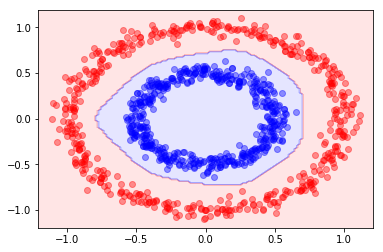

In [28]:
regions(X, y, classifier,['r','b'],resolution=0.02)

## Neural network implementation

Here we will implement our own neural network!

This is the sigmoid function.

In [29]:
def sigmoid(z):
    return 1/(1.0+np.exp(-z))

Implement the forward pass step for a neural network. The arguments are the input activations from the previous layer `inp`, a `nd x ni` matrix of `ni` activation values for each `nd` data samples in the training set. The weights `w` is a `no x (ni+1)` matrix for the coefficients of the linear combination, including the bias as the 0-th entry.

In [30]:
def forwardPass(inp,w):
    inp = np.insert(inp, 0, values=np.ones(np.shape(inp)[0]), axis=1)
    return sigmoid(inp.dot(w.T))

In [31]:
ni = 4
no = 7
nd = 10
np.random.seed(1212)
w = np.random.random(size=(no,ni+1))
xin = np.random.random(size=(nd,ni))

assert forwardPass(xin,w).shape == (nd,no)
assert np.isclose(forwardPass(xin,w),np.array([[0.8251632 , 0.830996  , 0.76300723, 0.79702941, 0.77600105,
        0.70190947, 0.83435626],
       [0.8359558 , 0.90050819, 0.87740353, 0.82827155, 0.87798334,
        0.74302696, 0.84477175],
       [0.79126012, 0.83815963, 0.84205947, 0.74776205, 0.82513204,
        0.74998091, 0.85470589],
       [0.82888311, 0.8632446 , 0.8147688 , 0.80891073, 0.82186723,
        0.7178646 , 0.83658403],
       [0.80946807, 0.84474154, 0.86229083, 0.76895771, 0.84571173,
        0.77088251, 0.87455304],
       [0.74507238, 0.8140036 , 0.83894366, 0.68989384, 0.80849411,
        0.74198462, 0.84545448],
       [0.79937484, 0.87904302, 0.91647618, 0.77229595, 0.89669958,
        0.79465015, 0.88390382],
       [0.71600556, 0.86712487, 0.88545761, 0.7058548 , 0.85982823,
        0.71534426, 0.81366481],
       [0.73806877, 0.84043116, 0.81406962, 0.73176977, 0.80139834,
        0.66464495, 0.79223601],
       [0.72038023, 0.80686616, 0.83495421, 0.67903918, 0.80210236,
        0.71812182, 0.83319276]])).all()

**Task 2**

Verify your implementation of the forward pass using the trained model in the first part of the exercise as an example. You can use the classifier's `predict_proba` member function and the `coefs_` and `intercept_` data members,

In [35]:
# This code saves the weights from the NN trained above 
# note that the weights are returned by the intercept (weight 0) and coefs (weights i where i=1,...,ni) data members
w1,w2 = classifier.coefs_
w1, w2 = np.array(w1), np.array(w2)
i1,i2 = classifier.intercepts_

# combine the coefs and intercept values to weight vectors
w1ni, w1no = w1.shape
w1all = np.empty((w1no, w1ni+1))
w1all[:,0] = i1
w1all[:,1:] = w1.T
w2ni, w2no = w2.shape
w2all = np.empty((w2no, w2ni+1))
w2all[:,0] = i2
w2all[:,1:] = w2.T

# Use the following sample as your test samples
Xtest = X[:3]
# return the outputs for the test sample above for your implementation and the sklearn implementation
# you should return an array with three values
mySolution = 0 # your outputs go here
skSolution = 0 # the sklearn outputs go here

# YOUR CODE HERE
hidden = forwardPass(Xtest, w1all)
mySolution = forwardPass(hidden, w2all).T[0]
skSolution = classifier.predict(Xtest)
print ("my implementation: ",mySolution)
print( "sklearn implementation: ", skSolution)

my implementation:  [0.99237515 0.97956449 0.00151048]
sklearn implementation:  [1 1 0]


In [36]:
assert np.isclose(mySolution, np.array([0.99237515, 0.97956449, 0.00151048])).all()